# Avaliações de Filmes do MovieLens

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns

In [2]:
data_root = "Dados/ml-latest/"

## Formato dos dados

In [3]:
# Relação entre id do filme e seu título
movies = pd.read_csv(data_root + "movies.csv")

# Conv para string
movies['title'] = movies['title'].astype('string')

# Removendo espaços nas extremidades
movies['title'] = movies['title'].str.strip()

# Função para buscar padrão de ano
import re
f = lambda title : True if (re.findall(r"\([0-9]{4}\)$", title)) else False

# Separando filmes que têm ano no título
selec = movies["title"].map(f)
movies = movies[selec]

# Separando conteúdo em coluna título e ano
movies["year"] = movies["title"].map(lambda title : title[-5:-1]).astype(int)
movies["title"] = movies["title"].map(lambda title : title[:-6])

# Mudando index
movies = movies.set_index("movieId")

# Exibindo
movies

,title,genres,year
movieId,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji,Adventure|Children|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama|Romance,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
288967,State of Siege: Temple Attack,Action|Drama,2021
288971,Ouija Japan,Action|Horror,2021
288975,The Men Who Made the Movies: Howard Hawks,Documentary,1973


In [4]:
# Lendo dados, renomeando colunas e exibindo primeiros itens
ratings = pd.read_csv(data_root + "ratings.csv")
ratings.columns = ["user", "movieId", "rating", "time"]
ratings

,user,movieId,rating,time
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [5]:
# Obtendo lista de todos os valores únicos de avaliação registrados
aval_unique = list(ratings['rating'].unique())
aval_unique.sort()

In [6]:
print("Os dados contém {} avaliações, cada qual com {} variáveis associadas.".format(ratings.shape[0], ratings.shape[1]))

print("\nEssas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.")

print("\nOs valores possíveis para se avaliar os filmes são:\n\n", ", ".join([str(value) for value in aval_unique]) + ".")

Os dados contém 33832162 avaliações, cada qual com 4 variáveis associadas.

Essas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.

Os valores possíveis para se avaliar os filmes são:

 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0.


### Estatísticas gerais

In [7]:
print("A média de todas as avaliações, independente do filme, foi {:.3f}".format(ratings[ 'rating'].mean()))
print("E a mediana dos mesmos dados, foi", ratings['rating'].median())

A média de todas as avaliações, independente do filme, foi 3.543
E a mediana dos mesmos dados, foi 4.0


# Visualização da Frequência de cada Avaliação

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequência')

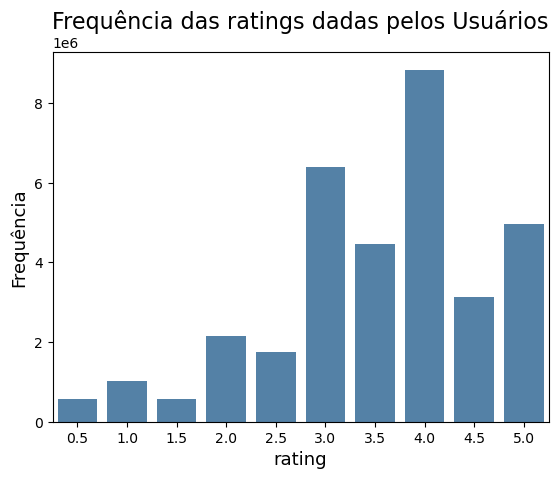

In [9]:
# Obtendo a frequência absoluta e plotando em um gráfico de barras
abs_freq = ratings['rating'].value_counts()

# Plotando
fig, ax = plt.subplots()
ax = sns.barplot(abs_freq, color = 'steelblue')

# Nomes no gráfico
ax.set_title("Frequência das ratings dadas pelos Usuários", fontsize = 16)
ax.set_xlabel('rating', fontsize = 13)
ax.set_ylabel('Frequência', fontsize = 13)

In [10]:
relat_freq = ratings['rating'].value_counts(normalize = True) * 100
relat_freq

rating
4.0    26.117027
3.0    18.918874
5.0    14.654405
3.5    13.197504
4.5     9.231024
2.0     6.344531
2.5     5.204317
1.0     2.996099
0.5     1.673869
1.5     1.662350
Name: proportion, dtype: float64

In [11]:
print("A frequência de ratings menores que 2.0 é {:.2f} %".format(sum(relat_freq[rating] for rating in [0.5, 1.0, 1.5])))

A frequência de ratings menores que 2.0 é 6.33 %


## Conclusões do Gráfico de Barras

Pela visualização, podemos ratingr, que 4.0 foi a rating mais frequentemente dada pelos usuários, e que em segundo lugar, está a avaliação 3.0. Observamos que poucas avaliações abaixo de 2.0 foram dadas. 

Olhando a relação das frequências relativa, vemos também que apesar de 5.0 ser a rating máxima que um filme pode receber, ela foi a 3ª avaliação mais frequente, correspondendo à 13.1% de todas as avaliações.

Parece haver um preferência por ratings inteiras. Vamos avaliar isso melhor a seguir.

## Inteiras vs. Fracionárias

Text(0.5, 1.0, 'ratings Fracionárias')

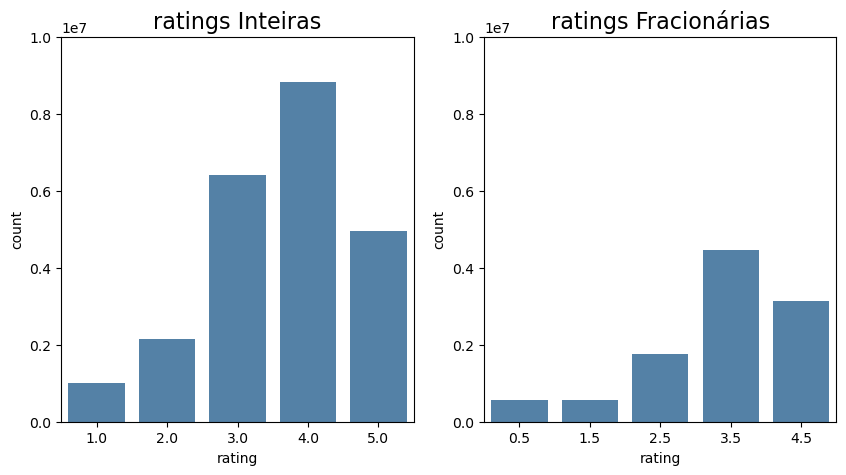

In [12]:
# Figura e eixos
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

# Limites dos eixos
ax1.set_ylim(0, 1e7)
ax2.set_ylim(0, 1e7)

# Plot inteiros
sns.barplot(abs_freq, color = 'steelblue', order = [1.0, 2.0, 3.0, 4.0, 5.0], ax = ax1)

# Plot fracionários
sns.barplot(abs_freq, color = 'steelblue', order = [0.5, 1.5, 2.5, 3.5, 4.5], ax = ax2)

# Títulos
ax1.set_title("ratings Inteiras", fontsize = 16)
ax2.set_title("ratings Fracionárias", fontsize = 16)

Ao plotarmos lado a lado, na mesma escala, as frequências das ratings inteiras e fracionárias, vemos que as duas tem um comportamento muito semelhante. Porém, ao mesmo tempo, a frequência das ratings fracionárias parecem bem menores.

Vamos calcular a frequência de uma em relação a outra:

In [13]:
relat_frac_freq = sum(relat_freq[rating] for rating in [0.5, 1.5, 2.5, 3.5, 4.5])
relat_int_freq  = 100 - relat_frac_freq

print(f"A ratings fracionárias são {relat_frac_freq:.1f} % de todas as ratings, de forma que as ratings inteiras são {relat_int_freq / relat_frac_freq:.1f} vezes mais frequentes que as fracionárias.")

A ratings fracionárias são 31.0 % de todas as ratings, de forma que as ratings inteiras são 2.2 vezes mais frequentes que as fracionárias.


# Avaliações por filme

## Múltiplas avaliações recebidas por um filme

In [14]:
# Vizualização todas as avalizações dadas ao filme 1
ratings.query("movieId==1").head(7)

,user,movieId,rating,time
0,1,1,4.0,1225734739
62,2,1,5.0,835815971
304,7,1,4.0,974518024
653,10,1,3.0,1430666394
852,12,1,5.0,862500738
952,14,1,2.5,1311533061
1242,21,1,3.0,1172695347


# Média de cada filme

Calculamos aqui, a média das ratings de cada filme dos dados.

In [15]:
# Agrupando os dados por filmes (todas as avaliações de cada filme em um grupo)
movie_grouped_ratings = ratings.groupby("movieId")

In [16]:
# Calculando a média de todos os filmes
movies_means = movie_grouped_ratings.mean()['rating']
movies_means

movieId
1         3.893508
2         3.278179
3         3.171271
4         2.868395
5         3.076957
            ...   
288967    3.500000
288971    0.500000
288975    4.000000
288977    3.000000
288983    3.000000
Name: rating, Length: 83239, dtype: float64

### Estatísticas dos dados

In [17]:
movies_means.describe()

count    83239.000000
mean         3.012706
std          0.790872
min          0.500000
25%          2.571429
50%          3.083333
75%          3.500000
max          5.000000
Name: rating, dtype: float64

# Plotando os dados de média por filme

## Boxplot

Text(0.5, 0, 'Média dos filmes')

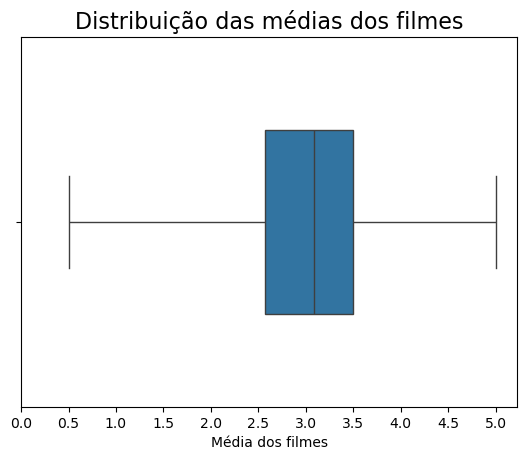

In [18]:
ax = sns.boxplot(x = movies_means, width = 0.5, whis=(0,100))
ticks = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
ax.set_xticks(ticks)
ax.set_title("Distribuição das médias dos filmes", fontsize = 16)
ax.set_xlabel("Média dos filmes")

### Conclusão boxplot

Pela visualização de boxplot gerada sobre as médias de avaliações de filmes, podemos ver pela pequena distância entre o primeiro e terceiro quartil, que as ratings estão muito concentradas entre aproximadamente 2.6 e 3.5, enquanto os outros intervalos estão espalhados em intervalos maiores.

Porém de toda forma, a distribuição ainda está um tanto deslocadas para a direita, o que indica uma assimetria à esquerda, de forma que os dados têm mais volume nos valores mais altos, e uma calma mais esticada à esquerda.

## Histograma

<Axes: xlabel='rating', ylabel='Count'>

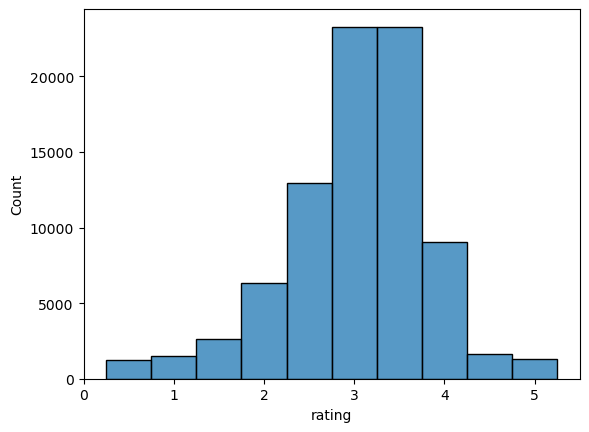

In [19]:
sns.histplot(movies_means, bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25] )

Observamos que poucos filmes têm avaliações médias acima de 4.25, apesar de muitas avaliações 5.0 serem individualmente dadas. Vamos calcular quantos são.

In [27]:
high_ratings_freq = (movies_means[movies_means > 4.0].shape[0] / movies_means.shape[0]) * 100

print("A frequência de filmes com avaliação média maior que 4.25, é {:.2f} %".format(high_ratings_freq))

A frequência de filmes com avaliação média maior que 4.25, é 4.71 %


Vamos investigar isso mais a fundo:

## Filmes com maior frequencia relativa de avaliações altas

In [34]:
# Montando o dataframe
df = pd.DataFrame()
df.index = movies_means.index
df['mean_rating'] = movies_means
df['vote_counts'] = ratings.groupby("movieId")["movieId"].value_counts()

# Filmes populares
vote_counts = ratings['movieId'].value_counts()

In [36]:
# Inserindo no DataFrame
df_copy = pd.DataFrame(df.query("vote_counts > 50").sort_values('5_relat_freq', ascending=False))
df_copy = pd.concat([df_copy, freq_relat_5], axis=1)
df_copy.index.name = 'movieId'

# Vizualização
ax = sns.scatterplot(data=df_copy, x="vote_counts", y="5_relat_freq")
ax.set_title("Taxa de avaliações altas x Contagem de avaliações", fontsize=16)

KeyError: '5_relat_freq'

Se chamarmos de avaliações altas as avaliações de 4.5 e 5.0 e avaliarmos a taxa de avaliações altas sobre o total, podemos ver que são raros os casos de filmes minimamente conhecidos tem a grande maioria das avalições altas. Ou seja, mesmo que um filme receba muitas avaliações altas, esse valor tende a se equilibra com avaliações menores.

## Scatterplot (Nota x Quantidade de avaliações)

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(data = df.query('vote_counts > 0 '), x = 'mean_rating', y = 'vote_counts', size = 1, ax = ax)

# Nomes no gráfico
ax.set_title("Relação entre Número de Votos e Nota para um filme", fontsize = 16)
ax.set_xlabel("Nota", fontsize = 13)
ax.set_ylabel("Quantidade de Votos", fontsize = 13)

### Filmes que têm grande quantidade de votos, tendem a ter notas mais altas

Observamos, que quanto maior a quantidade de votos um filme tem, é mais comum que o filme seja bem avaliado. Isso provavelmente vem do fato, que filmes de alta qualidade, tendem a se tornarem mais populares, de forma que mais pessoas os assistam e os avaliem. Em outras palavras, é improvável um filme que é amplamente considerado "ruim", angariar um grande público.

## Filmes perto do vértice

In [ ]:
# Adicionando nome e ano 
df_copy = pd.concat([df,  movies], axis = 1)

# Coluna de produto (num de votos * rating média)
df_copy['produto'] = df_copy['vote_counts'] * df_copy['mean_rating']

# Exibir ordenando pelo produto
df_copy.sort_values('produto', ascending = False).head(5)

In [ ]:
''' Como removemos alguns filmes do dataframe "filmes", ao juntarmos ele com o dataframe filmes_pop2,
    precisamos verificar e remover quaisquer filmes deste caso, para não ficarmos com dados incompletos '''

# Selecionando linhas com filmes populares
selec = filmes['movieId'].isin(filmes_pop)
nome_ano_pop = filmes[selec].set_index('movieId')[['title', 'ano']]

# Verificamos ao somar a series resultante do inverso do isin
# Que todos os filmes de um dataframe estão no outro
(~df_pop2.index.isin(nome_ano_pop.index)).sum()

## Limite de rating com mais de 50 votos

In [ ]:
df_pop2.query("qtde_votos > 50").query("rating_media > 4.2")

Ao mesmo tempo, quando um filme alcança uma quantidade maior de votos, é muito difícil que ele ultrapasse muito o limite de 4.2 na avaliação. Isso provelmente vem do fato, de que um filme não muito popular, pode atingir um nicho de pessoas particularmente interessadas naquele tipo de filme, e a maioria delas avaliar muito bem o filme. Mas ao atingir um público razoável, é muito difícil que o filme vá agradar a todos, impedindo assim, que um filme popular, atinja ratings muito altas.

## Dispersão de ratings por Filmes

In [ ]:
#####
pd.set_option('display.max_rows', 30)
#####

# Dados usados
ratings2 = ratings.drop(columns=['tempo','user']).copy()

selec = ratings2['movieId'].isin(filmes_pop)
ratings2 = ratings2[selec].copy()

# Agrupando por filme
grupo_ratings = ratings2.groupby('movieId')

# Calculando std
std_ratings = grupo_ratings.std()

# Renomeando coluna
std_ratings.columns = ['std_rating']

# Adicionando ao DataFrame 
df_pop3 = pd.concat([df_pop2, std_ratings], axis = 1)

# Buscando filmes  ################# EXPLORAR ########################
df_pop3.query('rating_media > 4.0').sort_values('std_rating', ascending = True)

# Relações com ano

Existe uma relação clara entre rating média e ano?

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))

sns.histplot(data = df_pop3.query('rating_media >= 3.5'), x = 'ano', 
             bins = [ (1930 + 5*i) for i in range(20) ], 
             color = 'r', label = 'Maior que 3.5', 
             ax = ax )

sns.histplot(data = df_pop3.query('rating_media < 3.5'), x = 'ano', 
             bins = [ (1930 + 5*i) for i in range(20) ], 
             color = 'b', label = 'Menor que 3.5' ,
             ax = ax )

plt.legend()

Podemos observar primeiramente, que antes de 

In [ ]:
### rating MÉDIA x ANO
sns.scatterplot(data = df_pop3, x = 'ano', y = 'rating_media') #,  hue = 'rating_media' )

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
fig, ax = plt.subplots(figsize = (10,30))

sns.barplot(y = df_pop3.groupby('ano')['rating_media'].mean().index, 
            x = df_pop3.groupby('ano')['rating_media'].mean().values, orient = 'h')

df_pop3.groupby('ano')['rating_media'].mean().sort_values()

In [ ]:
sns.scatterplot(data = df_pop3, x = 'ano', y = 'produto',  hue = 'rating_media' )

In [ ]:
ratings.query('movieId == 1276').sort_values('rating')['rating'].value_counts().sort_index()

In [ ]:
## BUSCA FILMES

filmes.query('movieId == 5888')